## Data Cleaning

Data is pulled from two sources:

1.   https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
2.   https://www.kaggle.com/datasets/mostafaabla/garbage-classification 

We use images for recyclable materials from the first link, and added trash and biological waste images from the second link to create more balanced classes. We have uploaded these folders to kaggle, and are available at this link:
https://www.kaggle.com/datasets/reesequillian/garbage-classification-recycle-trash


In [ ]:
!pip install python_splitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from random import *
import random
import python_splitter
import tensorflow as tf
import cv2
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns # for graphs
%matplotlib inline

In [ ]:
# pull data from github: 

!git clone https://github.com/rlq3fm/DS-4002-project2

# now we can access all data files

fatal: destination path 'DS-4002-project2' already exists and is not an empty directory.


In [ ]:
src_folder = "/content/DS-4002-project2/data"

In [ ]:
# split into testing and training
# https://github.com/bharatadk/python_splitter

python_splitter.split_from_folder(src_folder, train = 0.7, test = 0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


Using the python_splitter, we now have a folder of testing and training images to use in the model, with a 70/30 split.  

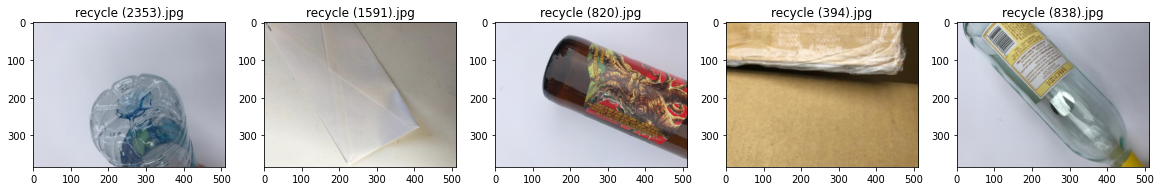

In [ ]:
len(os.listdir("/content/Train_Test_Folder/test/recycle"))
len(os.listdir("/content/Train_Test_Folder/test/trash"))


len(os.listdir("/content/Train_Test_Folder/train/recycle"))
len(os.listdir("/content/Train_Test_Folder/train/trash"))


# printing random images from a folder to make sure they loaded correctly
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir("/content/Train_Test_Folder/train/recycle"))
    image_path= os.path.join("/content/Train_Test_Folder/train/recycle", file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Now that the images are loaded, we need to turn them into arrays and normalize them so that we can give them to the model. Pixels range in value from 0-255, which represent color codes, so we can divide each by 255.

We use a function written by Renu Khandelwal (https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6)


In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder="/content/Train_Test_Folder/train"

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [ ]:
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [ ]:
# dictionary for classes
class_dict={k: v for v, k in enumerate(np.unique(class_name))}
class_dict

{'recycle': 0, 'trash': 1}

In [ ]:
target_val= [class_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
img_data[0:1]
# first image in array format

[array([[[0.77254903, 0.81960785, 0.8352941 ],
         [0.77254903, 0.81960785, 0.8352941 ],
         [0.77254903, 0.81960785, 0.8352941 ],
         ...,
         [0.7176471 , 0.7372549 , 0.77254903],
         [0.7176471 , 0.7372549 , 0.77254903],
         [0.7176471 , 0.7372549 , 0.77254903]],
 
        [[0.77254903, 0.81960785, 0.8352941 ],
         [0.77254903, 0.81960785, 0.8352941 ],
         [0.77254903, 0.81960785, 0.8352941 ],
         ...,
         [0.7176471 , 0.7372549 , 0.77254903],
         [0.7176471 , 0.7372549 , 0.77254903],
         [0.7176471 , 0.7372549 , 0.77254903]],
 
        [[0.77254903, 0.81960785, 0.8352941 ],
         [0.77254903, 0.81960785, 0.8352941 ],
         [0.77254903, 0.81960785, 0.8352941 ],
         ...,
         [0.72156864, 0.7411765 , 0.7764706 ],
         [0.72156864, 0.7411765 , 0.7764706 ],
         [0.72156864, 0.7411765 , 0.7764706 ]],
 
        ...,
 
        [[0.8509804 , 0.8666667 , 0.8862745 ],
         [0.8509804 , 0.8666667 , 0.88627

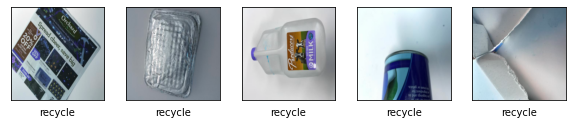

In [ ]:
# making sure images look right still
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_data[randint(1,1000)])
    plt.xlabel(class_name[i])
plt.show()

## Exploratory Data Analysis

Checking the balance of classes (recycle/trash) between testing and training sets

In [ ]:
## Creating df of num images per each train/test set by class

train = "/content/Train_Test_Folder/train"
test = "/content/Train_Test_Folder/test"

train_recycle = train + "/recycle"
test_recycle = test + "/recycle"
train_trash = train + "/trash"
test_trash = test + "/trash"

# Creating dict + df of class and len(class)

numImages_by_class_train = {   # df of Train, w/ respective recycle & trash nums
    'Class':['Recyclables','Trash'],
    'Num_images':[len(os.listdir(train_recycle)), len(os.listdir(train_trash))]}

numImages_by_class_test = {   # df of Test, w/ respective recycle & trash nums
    'Class':['Recyclables','Trash'],
    'Num_images':[len(os.listdir(test_recycle)), len(os.listdir(test_trash))]}

df_train = pd.DataFrame(numImages_by_class_train)
df_test = pd.DataFrame(numImages_by_class_test)

print(df_train)
print(df_test)


         Class  Num_images
0  Recyclables        1673
1        Trash        1177
         Class  Num_images
0  Recyclables         717
1        Trash         505


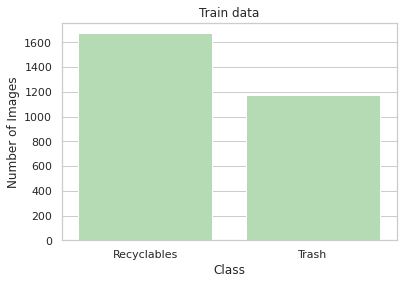

In [ ]:
## Class balance bar plot for Train

sns.set_style("whitegrid")

p1_train = sns.barplot(data=df_train, x='Class', y='Num_images',
                  order=['Recyclables','Trash'],
                  color='#AFE1AF')   

plt.title("Train data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

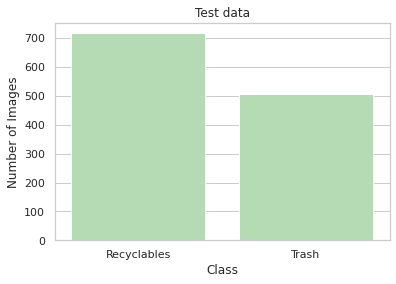

In [ ]:
## Class balance bar plot for Test

sns.set_style("whitegrid")

p1_test = sns.barplot(data=df_test, x='Class', y='Num_images',
                  order=['Recyclables','Trash'],
                  color='#AFE1AF')   

plt.title("Test data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


Checking image heights and widths
- This is an important step when applying deep learning techniques, since mismatches can lead to differences in predictive outcome

In [ ]:
# Creating dictionaries of image dimensions for test/train

directories = {'Train': train,
'Test': test}

def get_dims(file):
  '''Returns dimenstions for an RBG image'''
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

# creating loop that will iterate through folders in the dictionary and 
# return dimensions of each image which will be added to a df for plotting

for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = bag.from_sequence(filelist).map(get_dims)
  with diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

NameError: ignored

## Model